<a href="https://colab.research.google.com/github/sasank-02023036/Artificial_Intelligence_CS670/blob/main/Programming_assignments/Programming_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries

In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

Mounting google drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Read dataset: winequality-red.csv

This dataset contains physiochemical properties which determine a good a wine.

select columns: density, pH , alcohol

return dataframe df_select

Tip: use read_csv() function to read csv file

In [3]:
df = pd.read_csv('drive/MyDrive/Programming_assignment_1/winequality-red.csv')

In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
def get_col(df):
  #write your code here
  df_select = pd.DataFrame()
  for i in df.keys():
    if i == 'density' or i == 'pH' or i == 'alcohol':
      if df_select.empty:
        df_select = df[[i]]
      else:
        cols = list(df.columns.values)
        j = cols.pop(cols.index(i))
        column = list(df_select.columns.values)
        df_select = df[column+[j]]



  #######
  return df_select
data = get_col(df)
data

,density,pH,alcohol
0,0.99780,3.51,9.4
1,0.99680,3.20,9.8
2,0.99700,3.26,9.8
3,0.99800,3.16,9.8
4,0.99780,3.51,9.4
...,...,...,...
1594,0.99490,3.45,10.5
1595,0.99512,3.52,11.2
1596,0.99574,3.42,11.0
1597,0.99547,3.57,10.2


Normalizing data using min max normalization

Tip: use dataframe.min() and dataframe.max()

In [6]:
def norm_data(df_select):
  #write your code here
  Scaler = MinMaxScaler()
  scale = Scaler.fit_transform(df_select);

  normalized_df = scale

  ###########
  return normalized_df


print(norm_data(data))

data = norm_data(data)

[[0.56754772 0.60629921 0.15384615]
 [0.49412628 0.36220472 0.21538462]
 [0.50881057 0.40944882 0.21538462]
 ...
 [0.41629956 0.53543307 0.4       ]
 [0.39647577 0.65354331 0.27692308]
 [0.3979442  0.51181102 0.4       ]]


KMeans algorithm classifies the data points into given number of classes

write a code to classify data into 3 classes using KMeans library.

Write a code to plot all the classes in the same graph, the graph should be a 3D plot.

Tip: use figure.add_subplot() and scatter()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)
[0, 1, 2]


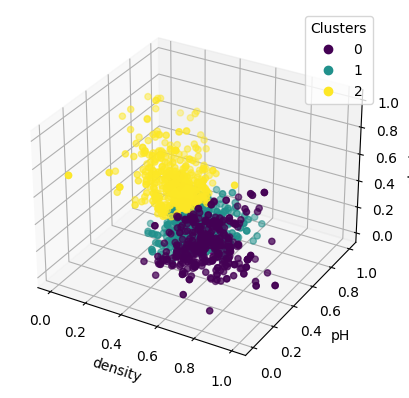

In [8]:
def classify(normalized_df):
  #write your code here
  km = KMeans(n_clusters = 3)
  km.fit(normalized_df)




  #############
  return km

kmeans = classify(data)
print(kmeans)

labels = kmeans.labels_

labels_set = set(labels)

labels_list = list(labels_set)

print(labels_list)

centers = kmeans.cluster_centers_

fig = plt.figure()

x = fig.add_subplot(111, projection = '3d')

scatter = x.scatter(data[:, 0], data[:, 1], data[:, 2], c=labels)

x.scatter(centers[:, 0], centers[:, 1], centers[:, 2], c='purple', marker='X', s=200, label='Cluster Centers')

x.set_xlabel('density')
x.set_ylabel('pH')
x.set_zlabel('alcohol')

x.legend(*scatter.legend_elements(), title='Clusters')

plt.show()